In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 92% 150M/163M [00:00<00:00, 176MB/s]
100% 163M/163M [00:00<00:00, 179MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2255.jpg', 'with_mask_1581.jpg', 'with_mask_1322.jpg', 'with_mask_1460.jpg', 'with_mask_3100.jpg']
['with_mask_1086.jpg', 'with_mask_3551.jpg', 'with_mask_143.jpg', 'with_mask_3698.jpg', 'with_mask_1732.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2551.jpg', 'without_mask_604.jpg', 'without_mask_2715.jpg', 'without_mask_2217.jpg', 'without_mask_421.jpg']
['without_mask_3503.jpg', 'without_mask_512.jpg', 'without_mask_1479.jpg', 'without_mask_1760.jpg', 'without_mask_970.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


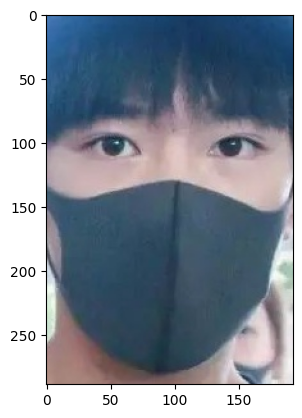

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1017.jpg')
imgplot = plt.imshow(img)
plt.show()

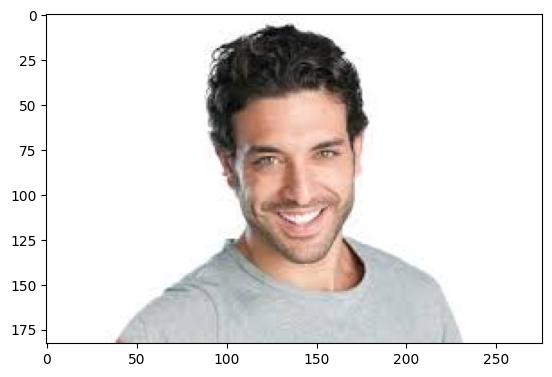

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[195, 195, 195],
        [196, 196, 196],
        [198, 198, 198],
        ...,
        [198, 198, 198],
        [196, 196, 196],
        [194, 194, 194]],

       [[196, 196, 196],
        [197, 197, 197],
        [199, 199, 199],
        ...,
        [198, 198, 198],
        [196, 196, 196],
        [195, 195, 195]],

       [[197, 197, 197],
        [198, 198, 198],
        [200, 200, 200],
        ...,
        [199, 199, 199],
        [197, 197, 197],
        [195, 195, 195]],

       ...,

       [[198, 198, 198],
        [199, 199, 199],
        [201, 201, 201],
        ...,
        [198, 198, 198],
        [196, 196, 196],
        [195, 195, 195]],

       [[197, 197, 197],
        [198, 198, 198],
        [200, 200, 200],
        ...,
        [197, 197, 197],
        [195, 195, 195],
        [194, 194, 194]],

       [[195, 195, 195],
        [196, 196, 196],
        [198, 198, 198],
        ...,
        [196, 196, 196],
        [194, 194, 194],
        [193, 193, 193]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[164, 138, 105],
        [144, 119,  89],
        [131, 108,  83],
        ...,
        [143, 129, 116],
        [142, 128, 115],
        [142, 128, 115]],

       [[166, 138, 105],
        [147, 120,  90],
        [132, 107,  82],
        ...,
        [155, 141, 128],
        [155, 141, 128],
        [152, 138, 125]],

       [[174, 144, 111],
        [154, 127,  97],
        [138, 112,  86],
        ...,
        [160, 147, 135],
        [159, 147, 134],
        [158, 146, 133]],

       ...,

       [[ 47,  64,  96],
        [ 43,  58,  88],
        [ 46,  58,  84],
        ...,
        [ 74,  79,  75],
        [ 70,  73,  70],
        [ 69,  73,  69]],

       [[ 46,  62,  94],
        [ 37,  52,  82],
        [ 37,  49,  75],
        ...,
        [ 58,  63,  59],
        [ 53,  56,  52],
        [ 49,  53,  49]],

       [[ 41,  57,  83],
        [ 27,  43,  68],
        [ 16,  30,  52],
        ...,
        [ 61,  65,  59],
        [ 55,  59,  53],
        [ 52,  57,  51]]

In [ ]:
X_train_scaled[0]

array([[[0.64313725, 0.54117647, 0.41176471],
        [0.56470588, 0.46666667, 0.34901961],
        [0.51372549, 0.42352941, 0.3254902 ],
        ...,
        [0.56078431, 0.50588235, 0.45490196],
        [0.55686275, 0.50196078, 0.45098039],
        [0.55686275, 0.50196078, 0.45098039]],

       [[0.65098039, 0.54117647, 0.41176471],
        [0.57647059, 0.47058824, 0.35294118],
        [0.51764706, 0.41960784, 0.32156863],
        ...,
        [0.60784314, 0.55294118, 0.50196078],
        [0.60784314, 0.55294118, 0.50196078],
        [0.59607843, 0.54117647, 0.49019608]],

       [[0.68235294, 0.56470588, 0.43529412],
        [0.60392157, 0.49803922, 0.38039216],
        [0.54117647, 0.43921569, 0.3372549 ],
        ...,
        [0.62745098, 0.57647059, 0.52941176],
        [0.62352941, 0.57647059, 0.5254902 ],
        [0.61960784, 0.57254902, 0.52156863]],

       ...,

       [[0.18431373, 0.25098039, 0.37647059],
        [0.16862745, 0.22745098, 0.34509804],
        [0.18039216, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 24ms/step - loss: 0.4377 - acc: 0.8047 - val_loss: 0.2928 - val_acc: 0.8810
Epoch 2/5
170/170 [==============================] - 4s 21ms/step - loss: 0.2882 - acc: 0.8816 - val_loss: 0.3125 - val_acc: 0.8512
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2454 - acc: 0.9047 - val_loss: 0.2377 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2119 - acc: 0.9200 - val_loss: 0.2229 - val_acc: 0.9058
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1870 - acc: 0.9237 - val_loss: 0.2023 - val_acc: 0.9157


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 13ms/step - loss: 0.1906 - acc: 0.9272
Test Accuracy = 0.9272005558013916


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
inception_model.trainable = False

model_inception = keras.Sequential([
    inception_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_of_classes, activation='sigmoid')
])

model_inception.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['acc'])

history_inception = model_inception.fit(preprocess_input(X_train_scaled), Y_train, validation_split=0.1, epochs=10)

loss_inception, accuracy_inception = model_inception.evaluate(preprocess_input(X_test_scaled), Y_test)
print('InceptionV3 Test Accuracy =', accuracy_inception)

87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/10
170/170 [==============================] - 16s 53ms/step - loss: 0.7603 - acc: 0.5577 - val_loss: 0.6416 - val_acc: 0.6496
Epoch 2/10
170/170 [==============================] - 5s 32ms/step - loss: 0.6349 - acc: 0.6020 - val_loss: 0.5957 - val_acc: 0.6760
Epoch 3/10
170/170 [==============================] - 6s 34ms/step - loss: 0.6182 - acc: 0.6132 - val_loss: 0.6550 - val_acc: 0.6298
Epoch 4/10
170/170 [==============================] - 5s 32ms/step - loss: 0.6241 - acc: 0.6068 - val_loss: 0.5776 - val_acc: 0.7273
Epoch 5/10
170/170 [==============================] - 6s 33ms/step - loss: 0.6180 - acc: 0.6150 - val_loss: 0.5708 - val_acc: 0.7388
Epoch 6/10
170/170 [==============================] - 5s 31ms/step - loss: 0.6064 - acc: 0.6244 - val_loss: 0.5292 - val_acc: 0.7322
Epoch 7/10
170/170 [==============================] - 6s 32ms/step - loss: 0.5941 - acc: 0.6248 - val_loss: 0.5083 - val_acc: 0.7636
Epo

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
vgg16_model.trainable = False

model_vgg16 = keras.Sequential([
    vgg16_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_of_classes, activation='sigmoid')
])

model_vgg16.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

history_vgg16 = model_vgg16.fit(preprocess_input(X_train_scaled), Y_train, validation_split=0.1, epochs=10)

loss_vgg16, accuracy_vgg16 = model_vgg16.evaluate(preprocess_input(X_test_scaled), Y_test)
print('VGG16 Test Accuracy =', accuracy_vgg16)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
170/170 [==============================] - 16s 68ms/step - loss: 0.8036 - acc: 0.5010 - val_loss: 0.6929 - val_acc: 0.5140
Epoch 2/10
170/170 [==============================] - 8s 49ms/step - loss: 0.6931 - acc: 0.5056 - val_loss: 0.6930 - val_acc: 0.5140
Epoch 3/10
170/170 [==============================] - 8s 45ms/step - loss: 0.6931 - acc: 0.5056 - val_loss: 0.6929 - val_acc: 0.5140
Epoch 4/10
170/170 [==============================] - 8s 49ms/step - loss: 0.6931 - acc: 0.5056 - val_loss: 0.6929 - val_acc: 0.5140
Epoch 5/10
170/170 [==============================] - 8s 46ms/step - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6929 - val_acc: 0.5140
Epoch 6/10
170/170 [==============================] - 8s 49ms/step - loss: 0.6931 - acc: 0.5056 - val_loss: 0.6929 - val_acc: 0.5140
Epoch 7/10
170/170 [==============================] - 9s 50ms/step - loss: 0.6932 - acc: 0.5056 - val_loss: 0.6929 - val_acc: 0.5140
Epo

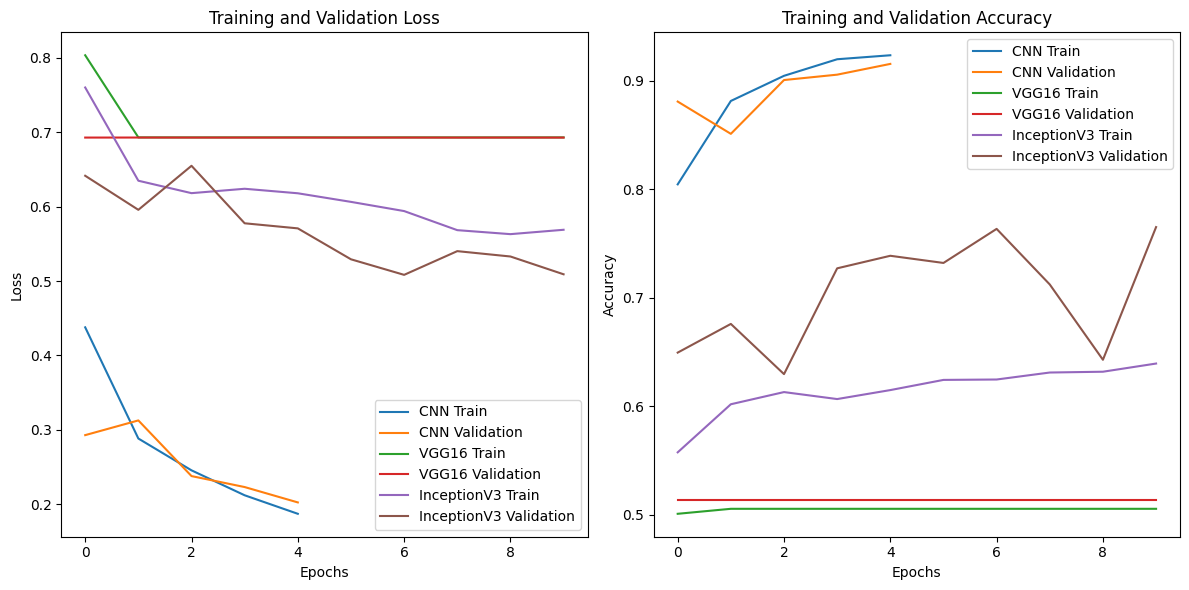

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='CNN Train')
plt.plot(history.history['val_loss'], label='CNN Validation')
plt.plot(history_vgg16.history['loss'], label='VGG16 Train')
plt.plot(history_vgg16.history['val_loss'], label='VGG16 Validation')
plt.plot(history_inception.history['loss'], label='InceptionV3 Train')
plt.plot(history_inception.history['val_loss'], label='InceptionV3 Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='CNN Train')
plt.plot(history.history['val_acc'], label='CNN Validation')
plt.plot(history_vgg16.history['acc'], label='VGG16 Train')
plt.plot(history_vgg16.history['val_acc'], label='VGG16 Validation')
plt.plot(history_inception.history['acc'], label='InceptionV3 Train')
plt.plot(history_inception.history['val_acc'], label='InceptionV3 Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

48/48 [==============================] - 1s 25ms/step


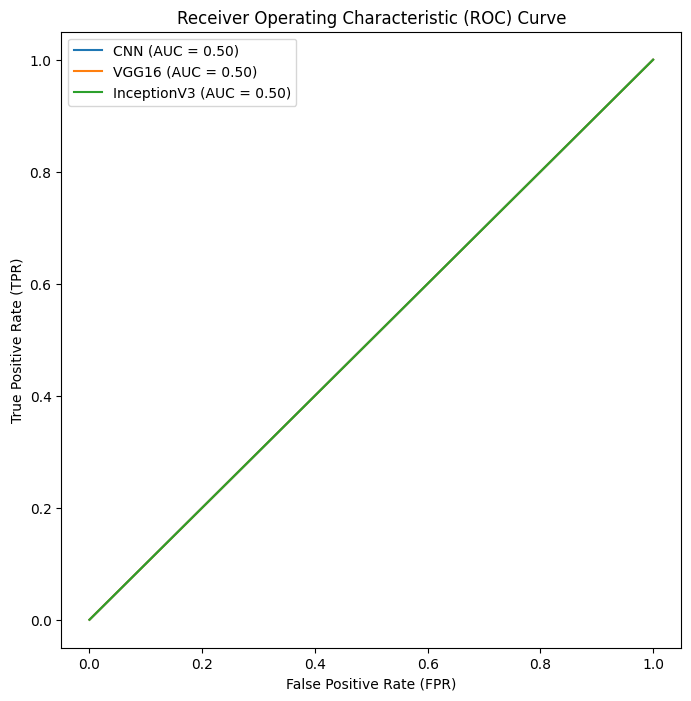

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, name, X_test, y_test):
    y_pred_proba = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 8))

plot_roc_curve(model, 'CNN', X_test_scaled, Y_test)
plot_roc_curve(model_vgg16, 'VGG16', preprocess_input(X_test_scaled), Y_test)
plot_roc_curve(model_inception, 'InceptionV3', preprocess_input(X_test_scaled), Y_test)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

Path of the image to be predicted: /content/test1.jpg


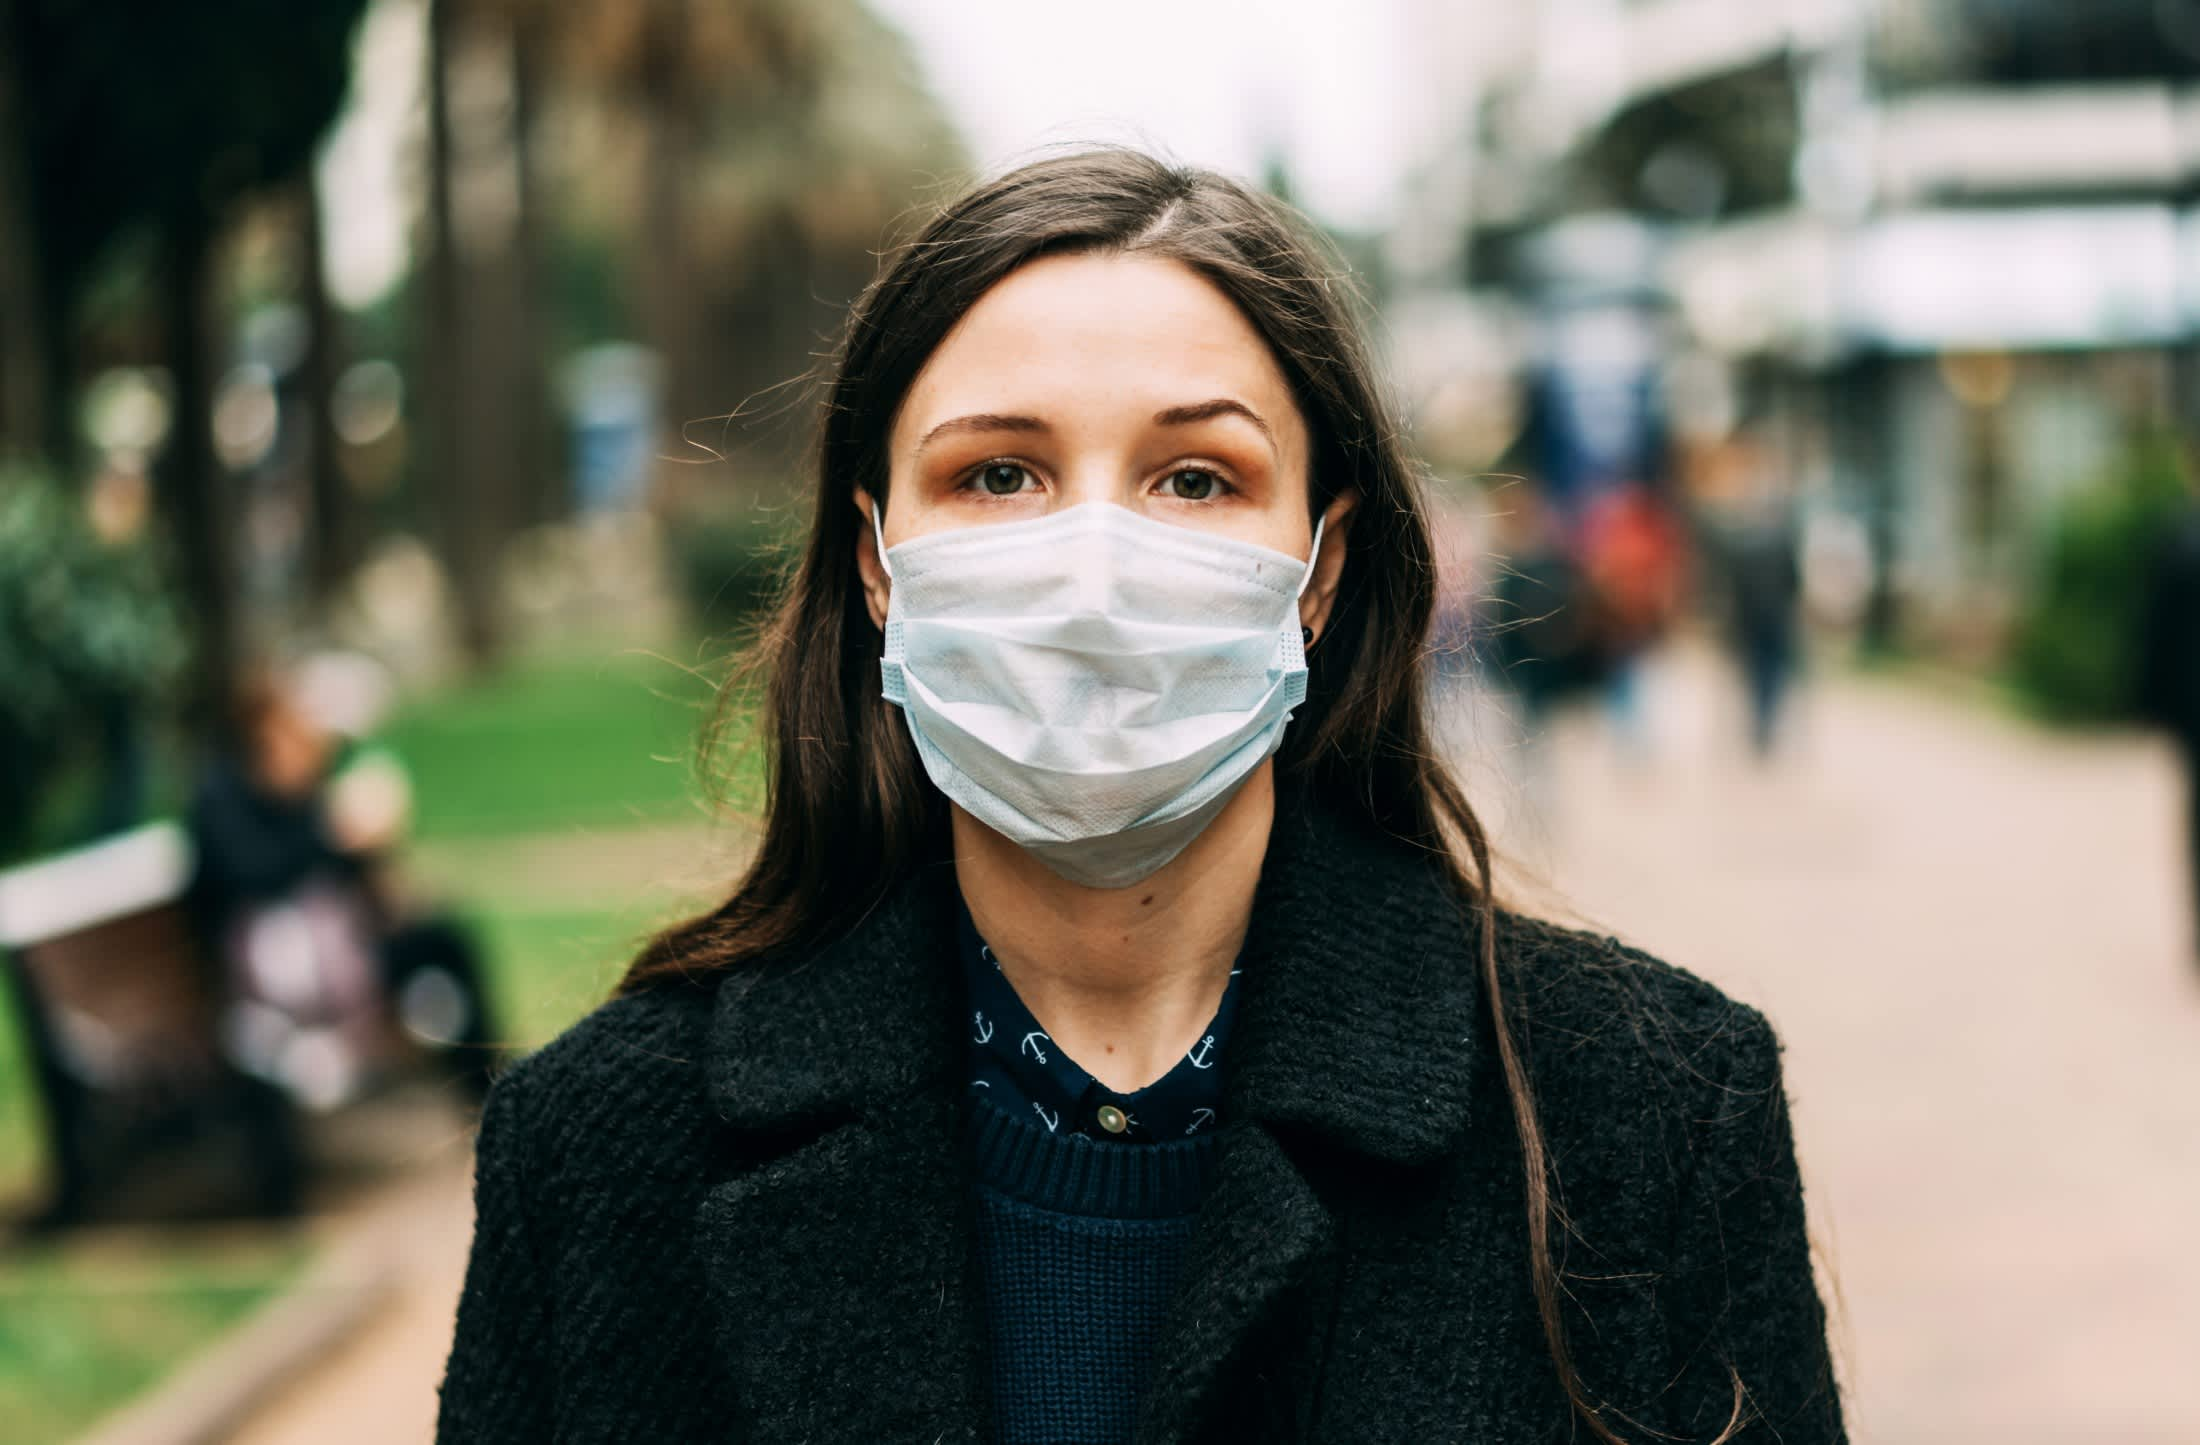

1/1 [==============================] - 0s 230ms/step
[[0.5096525  0.51233315]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
import joblib

joblib.dump(model, 'cnn_model.pkl')

joblib.dump(model_vgg16, 'vgg16_model.pkl')

joblib.dump(model_inception, 'inception_model.pkl')


['inception_model.pkl']

In [ ]:
loaded_cnn_model = joblib.load('cnn_model.pkl')

loaded_vgg16_model = joblib.load('vgg16_model.pkl')

loaded_inception_model = joblib.load('inception_model.pkl')